<a href="https://colab.research.google.com/github/abhijain1216/Retail-Sales-Prediction-Regression-Project/blob/main/Retail_Sales_Prediction_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Retail Sales Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**                - Abhinav Jain

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
sales_df = pd.read_csv('/content/drive/MyDrive/Projects/Almabetter Regression Capstone Project/Rossmann Stores Data.csv')
stores_df = pd.read_csv('/content/drive/MyDrive/Projects/Almabetter Regression Capstone Project/store.csv')

### Dataset First View

In [4]:
# Dataset First Look

# Rossmann sales dataframe
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
# Rossmann stores dataframe
stores_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(f'Rossmann Sales Dataframe : rows = { sales_df.shape[0]} , columns = { sales_df.shape[1]}')
print(f'Rossmann Stores Dataframe : rows = { stores_df.shape[0]} , columns = { stores_df.shape[1]}')

Rossmann Sales Dataframe : rows = 1017209 , columns = 9
Rossmann Stores Dataframe : rows = 1115 , columns = 10


### Dataset Information

In [7]:
# Dataset Info

# Sales dataframe information
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [8]:
# Stores dataframe information
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
print(f'Duplicate Values in Sales Dataframe : {sales_df.duplicated().sum()}')
print(f'Duplicate Values in Stores Dataframe : {stores_df.duplicated().sum()}')

Duplicate Values in Sales Dataframe : 0
Duplicate Values in Stores Dataframe : 0


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count

# Null values in sales dataframe
sales_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

We don't have any null values or misssing values in sales dataframe.

In [11]:
# Null values in stores dataframe
missing_df = stores_df.isnull().sum().reset_index().rename(columns = {'index':'column_name',0:'missing_values'})
missing_df

,column_name,missing_values
0,Store,0
1,StoreType,0
2,Assortment,0
3,CompetitionDistance,3
4,CompetitionOpenSinceMonth,354
5,CompetitionOpenSinceYear,354
6,Promo2,0
7,Promo2SinceWeek,544
8,Promo2SinceYear,544
9,PromoInterval,544


Stores dataframe has null values in five columns.

<Axes: >

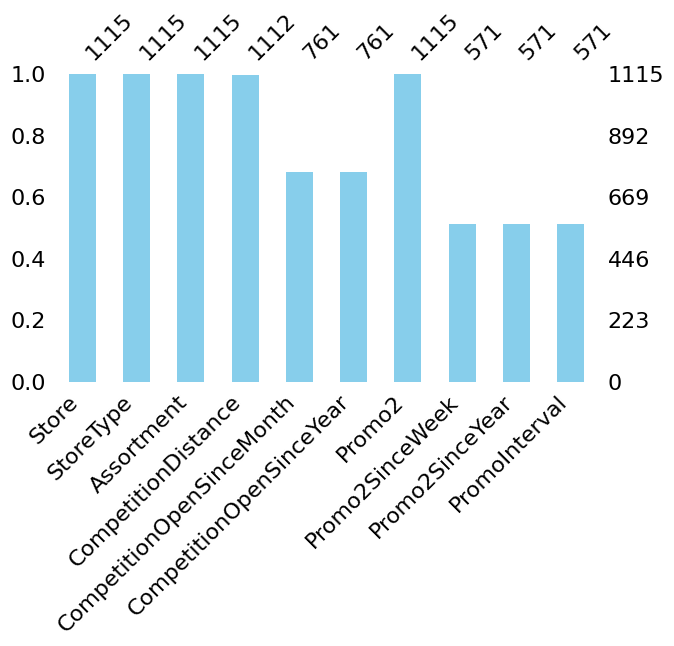

In [12]:
# Visualizing the missing values
msno.bar(stores_df,figsize=(7,4),color = 'skyblue')

### What did you know about your dataset?

* There are two datasets: the first one contains information about the sales of different Rossmann stores, and the second one contains information about stores.

* Sales data has 1017209 rows and 9 columns, whereas store data has 1115 rows and 10 columns.
* There is no duplicate values in any of the dataframe.
* Rossmann's Sales dataframe has no missing or null values, but the Stores dataframe has some missing values that need to be treated.

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
print(f'Columns in Sales Dataframe : {list(sales_df.columns)}')
print('\n')
print(f'Columns in Store Dataframe : {list(stores_df.columns)}')

Columns in Sales Dataframe : ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']


Columns in Store Dataframe : ['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


In [14]:
# Dataset Describe

# Sales data description
sales_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [15]:
# Store data description
stores_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### Variables Description

* **Id** - an Id that represents a (Store, Date) duple within the test set
* **Store** - a unique Id for each store
* **Sales** - the turnover for any given day (this is what you are predicting)
* **Customers** - the number of customers on a given day
* **Open** - an indicator for whether the store was open: 0 = closed, 1 = open
* **StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

* **SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools
* **StoreType** - differentiates between 4 different store models: a, b, c, d
* **Assortment** - describes an assortment level: a = basic, b = extra, c = extended
* **CompetitionDistance** - distance in meters to the nearest competitor store
* **CompetitionOpenSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened
* **Promo** - indicates whether a store is running a promo on that day
* **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

* **Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2
* **PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.

# Unique values in sales dataframe
for i in list(sales_df.columns):
    print(f'unique values in column {i} is : {sales_df[i].unique()}')

unique values in column Store is : [   1    2    3 ... 1113 1114 1115]
unique values in column DayOfWeek is : [5 4 3 2 1 7 6]
unique values in column Date is : ['2015-07-31' '2015-07-30' '2015-07-29' '2015-07-28' '2015-07-27'
 '2015-07-26' '2015-07-25' '2015-07-24' '2015-07-23' '2015-07-22'
 '2015-07-21' '2015-07-20' '2015-07-19' '2015-07-18' '2015-07-17'
 '2015-07-16' '2015-07-15' '2015-07-14' '2015-07-13' '2015-07-12'
 '2015-07-11' '2015-07-10' '2015-07-09' '2015-07-08' '2015-07-07'
 '2015-07-06' '2015-07-05' '2015-07-04' '2015-07-03' '2015-07-02'
 '2015-07-01' '2015-06-30' '2015-06-29' '2015-06-28' '2015-06-27'
 '2015-06-26' '2015-06-25' '2015-06-24' '2015-06-23' '2015-06-22'
 '2015-06-21' '2015-06-20' '2015-06-19' '2015-06-18' '2015-06-17'
 '2015-06-16' '2015-06-15' '2015-06-14' '2015-06-13' '2015-06-12'
 '2015-06-11' '2015-06-10' '2015-06-09' '2015-06-08' '2015-06-07'
 '2015-06-06' '2015-06-05' '2015-06-04' '2015-06-03' '2015-06-02'
 '2015-06-01' '2015-05-31' '2015-05-30' '2015-05

In [17]:
# Unique values in store dataframe

for i in list(stores_df.columns):
    print(f'unique values in column {i} is : {stores_df[i].unique()}')

unique values in column Store is : [   1    2    3 ... 1113 1114 1115]
unique values in column StoreType is : ['c' 'a' 'd' 'b']
unique values in column Assortment is : ['a' 'c' 'b']
unique values in column CompetitionDistance is : [1.270e+03 5.700e+02 1.413e+04 6.200e+02 2.991e+04 3.100e+02 2.400e+04
 7.520e+03 2.030e+03 3.160e+03 9.600e+02 1.070e+03 1.300e+03 4.110e+03
 3.270e+03 5.000e+01 1.384e+04 3.240e+03 2.340e+03 5.500e+02 1.040e+03
 4.060e+03 4.590e+03 4.300e+02 2.300e+03 6.000e+01 1.200e+03 2.170e+03
 4.000e+01 9.800e+03 2.910e+03 1.320e+03 2.240e+03 7.660e+03 5.400e+02
 4.230e+03 1.090e+03 2.600e+02 1.800e+02 1.180e+03 2.900e+02 4.880e+03
 9.710e+03 2.700e+02 1.060e+03 1.801e+04 6.260e+03 1.057e+04 4.500e+02
 3.036e+04 7.170e+03 7.200e+02 6.620e+03 4.200e+02 7.340e+03 2.840e+03
 5.540e+03 3.500e+02 2.050e+03 3.700e+03 2.256e+04 4.100e+02 2.500e+02
 1.130e+03 4.840e+03 1.750e+04 2.200e+03 1.650e+03 3.300e+02 2.244e+04
 1.996e+04 3.510e+03 3.320e+03 7.910e+03 2.370e+03 2.239e+0

## 3. ***Data Wrangling***

### Data Wrangling Code

**Datatype Treatment in SateHoliday Column**

In the sales dataframe, the StateHolidays column has two zero values: one is an integer, and the other is a string. So we're going to combine them all by replacing all integer zero values with 0 as a string.

In [18]:
sales_df['StateHoliday'] = sales_df['StateHoliday'].map({0:'0','a':'a','b':'b','c':'c','0':'0'})

In [19]:
# Let's check unique values for StateHolidays column again
sales_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

**Handling Missing/Null Values in Store Dataframe**

In [20]:
# Sum of null values for each column
stores_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

**1. Replacing missing values in the Competition Distance column**

There are three missing values in Competition Distance column

<Axes: xlabel='CompetitionDistance', ylabel='Density'>

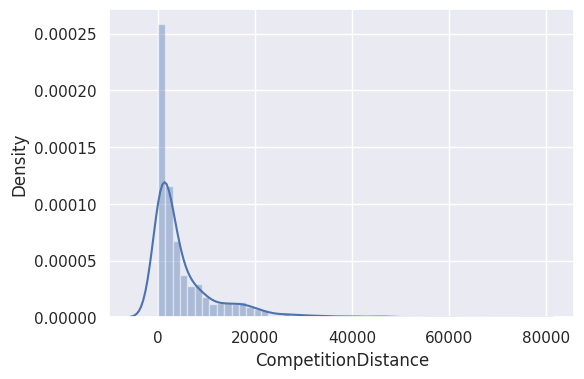

In [21]:
# Let's check the distribution of CompetitionDistance
plt.figure(figsize = (6,4))
sns.set_theme()
sns.distplot(stores_df['CompetitionDistance'])

Since the data has a positively skewed distribution, we can't replace null values with the mean because that would create bias in the analysis. That's why we will use the median to replace null values.

In [22]:
# Replace null values with median
stores_df['CompetitionDistance'].fillna(stores_df['CompetitionDistance'].median(),inplace = True)

In [23]:
# Let's check if there is any other null value  in Competition Distance column
stores_df['CompetitionDistance'].isnull().sum()

0

**2. Replacing missing values in the CompetitionOpenSinceMonth  and CompetitionOpenSinceYear columns**

There are 354 missing values in each column

<Axes: xlabel='CompetitionOpenSinceYear', ylabel='Density'>

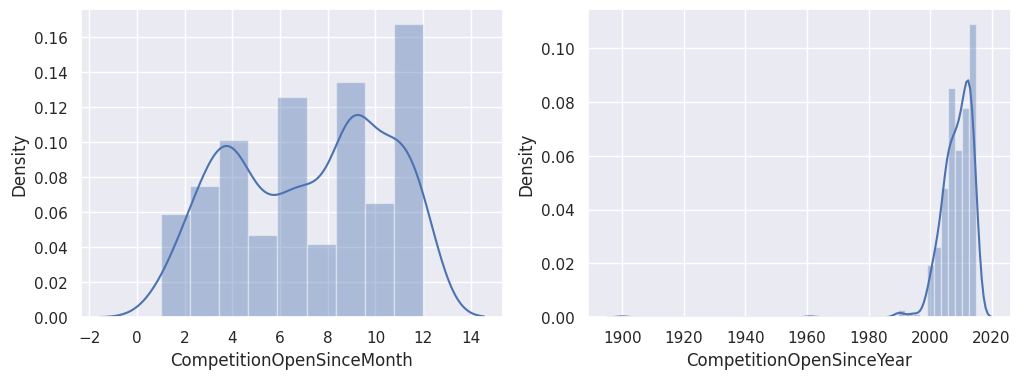

In [24]:
# Let's check distribution for each column
fig,ax = plt.subplots(1,2,figsize = (12,4))

sns.distplot(stores_df['CompetitionOpenSinceMonth'],ax = ax[0])
sns.distplot(stores_df['CompetitionOpenSinceYear'],ax = ax[1])

The distribution for both these columns is different. First one is normally distributed among two regions, and the second one is negatively skewedly distributed.We are going to replace the missing values for both of these columns with the mode that will give the most frequent month and year.

In [25]:
# Replace the misssing values for both of these columns with mode
stores_df['CompetitionOpenSinceMonth'].fillna(stores_df['CompetitionOpenSinceMonth'].mode()[0],inplace = True)
stores_df['CompetitionOpenSinceYear'].fillna(stores_df['CompetitionOpenSinceYear'].mode()[0],inplace = True)

In [26]:
# Let's check if it worked or not
stores_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

**3. Replacing missing values in the Promo2SinceWeek, Promo2SinceYear and PromoInterval columns**  

There are 544 missing values in each column

In [27]:
# First check what are the null values
stores_df[stores_df['Promo2SinceWeek'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,9.0,2013.0,0,NaN,NaN,NaN


Here, for the stores for which promo2 is 0 (i.e., they are not participating in promotions), values for Promo2SinceWeek, Promo2SinceYear, and PromoInterval are null, so we can simply replace null values with zero because there are no promotions for these stores.

In [28]:
# Replacing null values in Promo2SinceWeek, Promo2SinceYear and PromoInterval columns with 0
stores_df['Promo2SinceWeek'].fillna(0,inplace = True)
stores_df['Promo2SinceYear'].fillna(0,inplace = True)
stores_df['PromoInterval'].fillna(0,inplace = True)

In [29]:
# Let's check if there are any null/missing values left
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


Finally, there are no more missing/null values.

**Merging of Dataframes**

For merging the two dataframes, we will use a inner join on the sales dataframe and the store dataframe.

In [30]:
# Merging of data frame
rossmann_sales_df = pd.merge(sales_df,stores_df,on = 'Store',how = 'inner')

In [31]:
# Let's check first view of merged dataframe
rossmann_sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [32]:
# Checking all the columns
print(f'Columns in Rossmann Sales Datafrmae : {list(rossmann_sales_df.columns)}')

Columns in Rossmann Sales Datafrmae : ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


In [33]:
# Dataset info
rossmann_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

There are total of 1017209 entries in 18 columns, and there are no null/missing values.

**Casting Data Types**

In [34]:
# Change the  datatype of CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear columns to int

rossmann_sales_df["CompetitionDistance"]= rossmann_sales_df["CompetitionDistance"].astype(int)
rossmann_sales_df["CompetitionOpenSinceMonth"]= rossmann_sales_df["CompetitionOpenSinceMonth"].astype(int)
rossmann_sales_df["CompetitionOpenSinceYear"]= rossmann_sales_df["CompetitionOpenSinceYear"].astype(int)
rossmann_sales_df["Promo2SinceWeek"]= rossmann_sales_df["Promo2SinceWeek"].astype(int)
rossmann_sales_df["Promo2SinceYear"]= rossmann_sales_df["Promo2SinceYear"].astype(int)

In [35]:
# Change the datatype of date object to datetime
rossmann_sales_df['Date'] =  pd.to_datetime(rossmann_sales_df["Date"],format="%Y/%m/%d")

In [36]:
# Let's check the datatypes again
rossmann_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [37]:
# Check dataframe values again
rossmann_sales_df.head(6)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270,9,2008,0,0,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270,9,2008,0,0,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270,9,2008,0,0,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270,9,2008,0,0,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270,9,2008,0,0,0,0
5,1,7,2015-07-26,0,0,0,0,0,0,c,a,1270,9,2008,0,0,0,0


**Create New Features Week,Month and Year from Date Column**

In [38]:
# Extract month and year from date
rossmann_sales_df['Year'] = rossmann_sales_df['Date'].dt.year
rossmann_sales_df['Month'] = rossmann_sales_df['Date'].dt.month
rossmann_sales_df["WeekOfYear"]= rossmann_sales_df["Date"].dt.week
rossmann_sales_df["DayOfMonth"]= rossmann_sales_df["Date"].dt.day

In [39]:
# Check the dataframe
rossmann_sales_df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfMonth
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9,2008,0,0,0,0,2015,7,31,31
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,9,2008,0,0,0,0,2015,7,31,30
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,9,2008,0,0,0,0,2015,7,31,29
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,9,2008,0,0,0,0,2015,7,31,28
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,9,2008,0,0,0,0,2015,7,31,27


In [40]:
# Final dataframe info
rossmann_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

### What all manipulations have you done and insights you found?

* Replaced the missing values in the competition distance column with the median value of the entire column.
* Replaced the missing values in the CompetitionOpenSinceMonth and CompetitionOpenSinceYear columns with mode value.
* Replaced the missing values in the Promo2SinceWeek, Promo2SinceYear and PromoInterval columns with zero.
* After treating all the missing values, merged the sales dataframe and store dataframe using an inner join on the store column.
* Changed the datatype of columns CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek and Promo2SinceYear from float to integer.
* Changed the datatype of date from object to datetime.
* Created two new features, month and year, from the date feature by extracting month and year.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1



Distribution of Continuous Numerical Variables

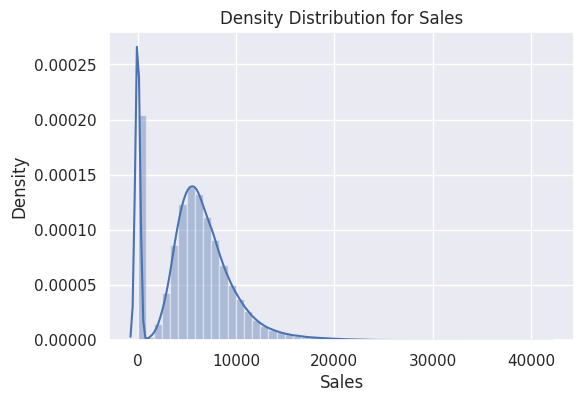

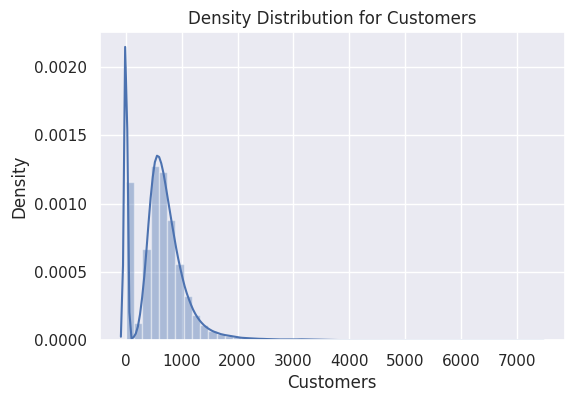

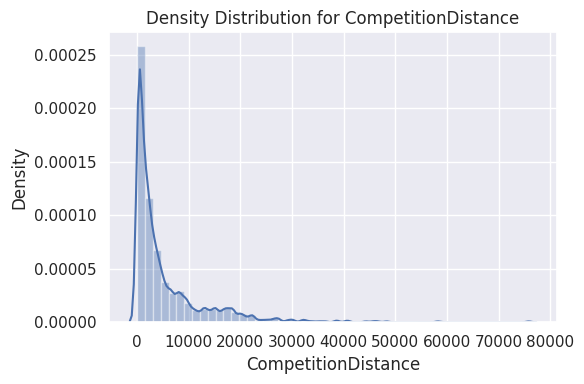

In [41]:
# Chart - 1 visualization code

features = ['Sales', 'Customers','CompetitionDistance']

# Visulization
for feature in features:
    fig = plt.figure(figsize = (6,4))
    ax = fig.gca()
    sns.distplot(rossmann_sales_df[feature])
    ax.set_title('Density Distribution for'+' '+ feature)
    ax.set_xlabel(feature)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Distribution plots plot a univariate distribution of data and are of crucial importance for exploratory data analysis. They help us detect outliers and skewness, or get an overview of the measures of central tendency (mean, median, and mode). That's why, to find some insights about numerical columns, a distribution plot is used.

##### 2. What is/are the insight(s) found from the chart?

* The distributions for the features Sales, Customers, and Competition Distance are positively skewed.
* These features required transformations like log and squareroot to make them normally distributed before implementing the regression model.
* From the density distribution plots, it is evident that most of the customers that visit the store range between 0 to 2000.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the distribution plot of competition distance, it is clear that most of the distances lie in the range of 0 to 25,000 , which means they are densely located in neighbourhood areas, so there should be a proper  strategy to sustain the business in highly competitive areas.

#### Chart - 2



Count Plots for Discrete Variables

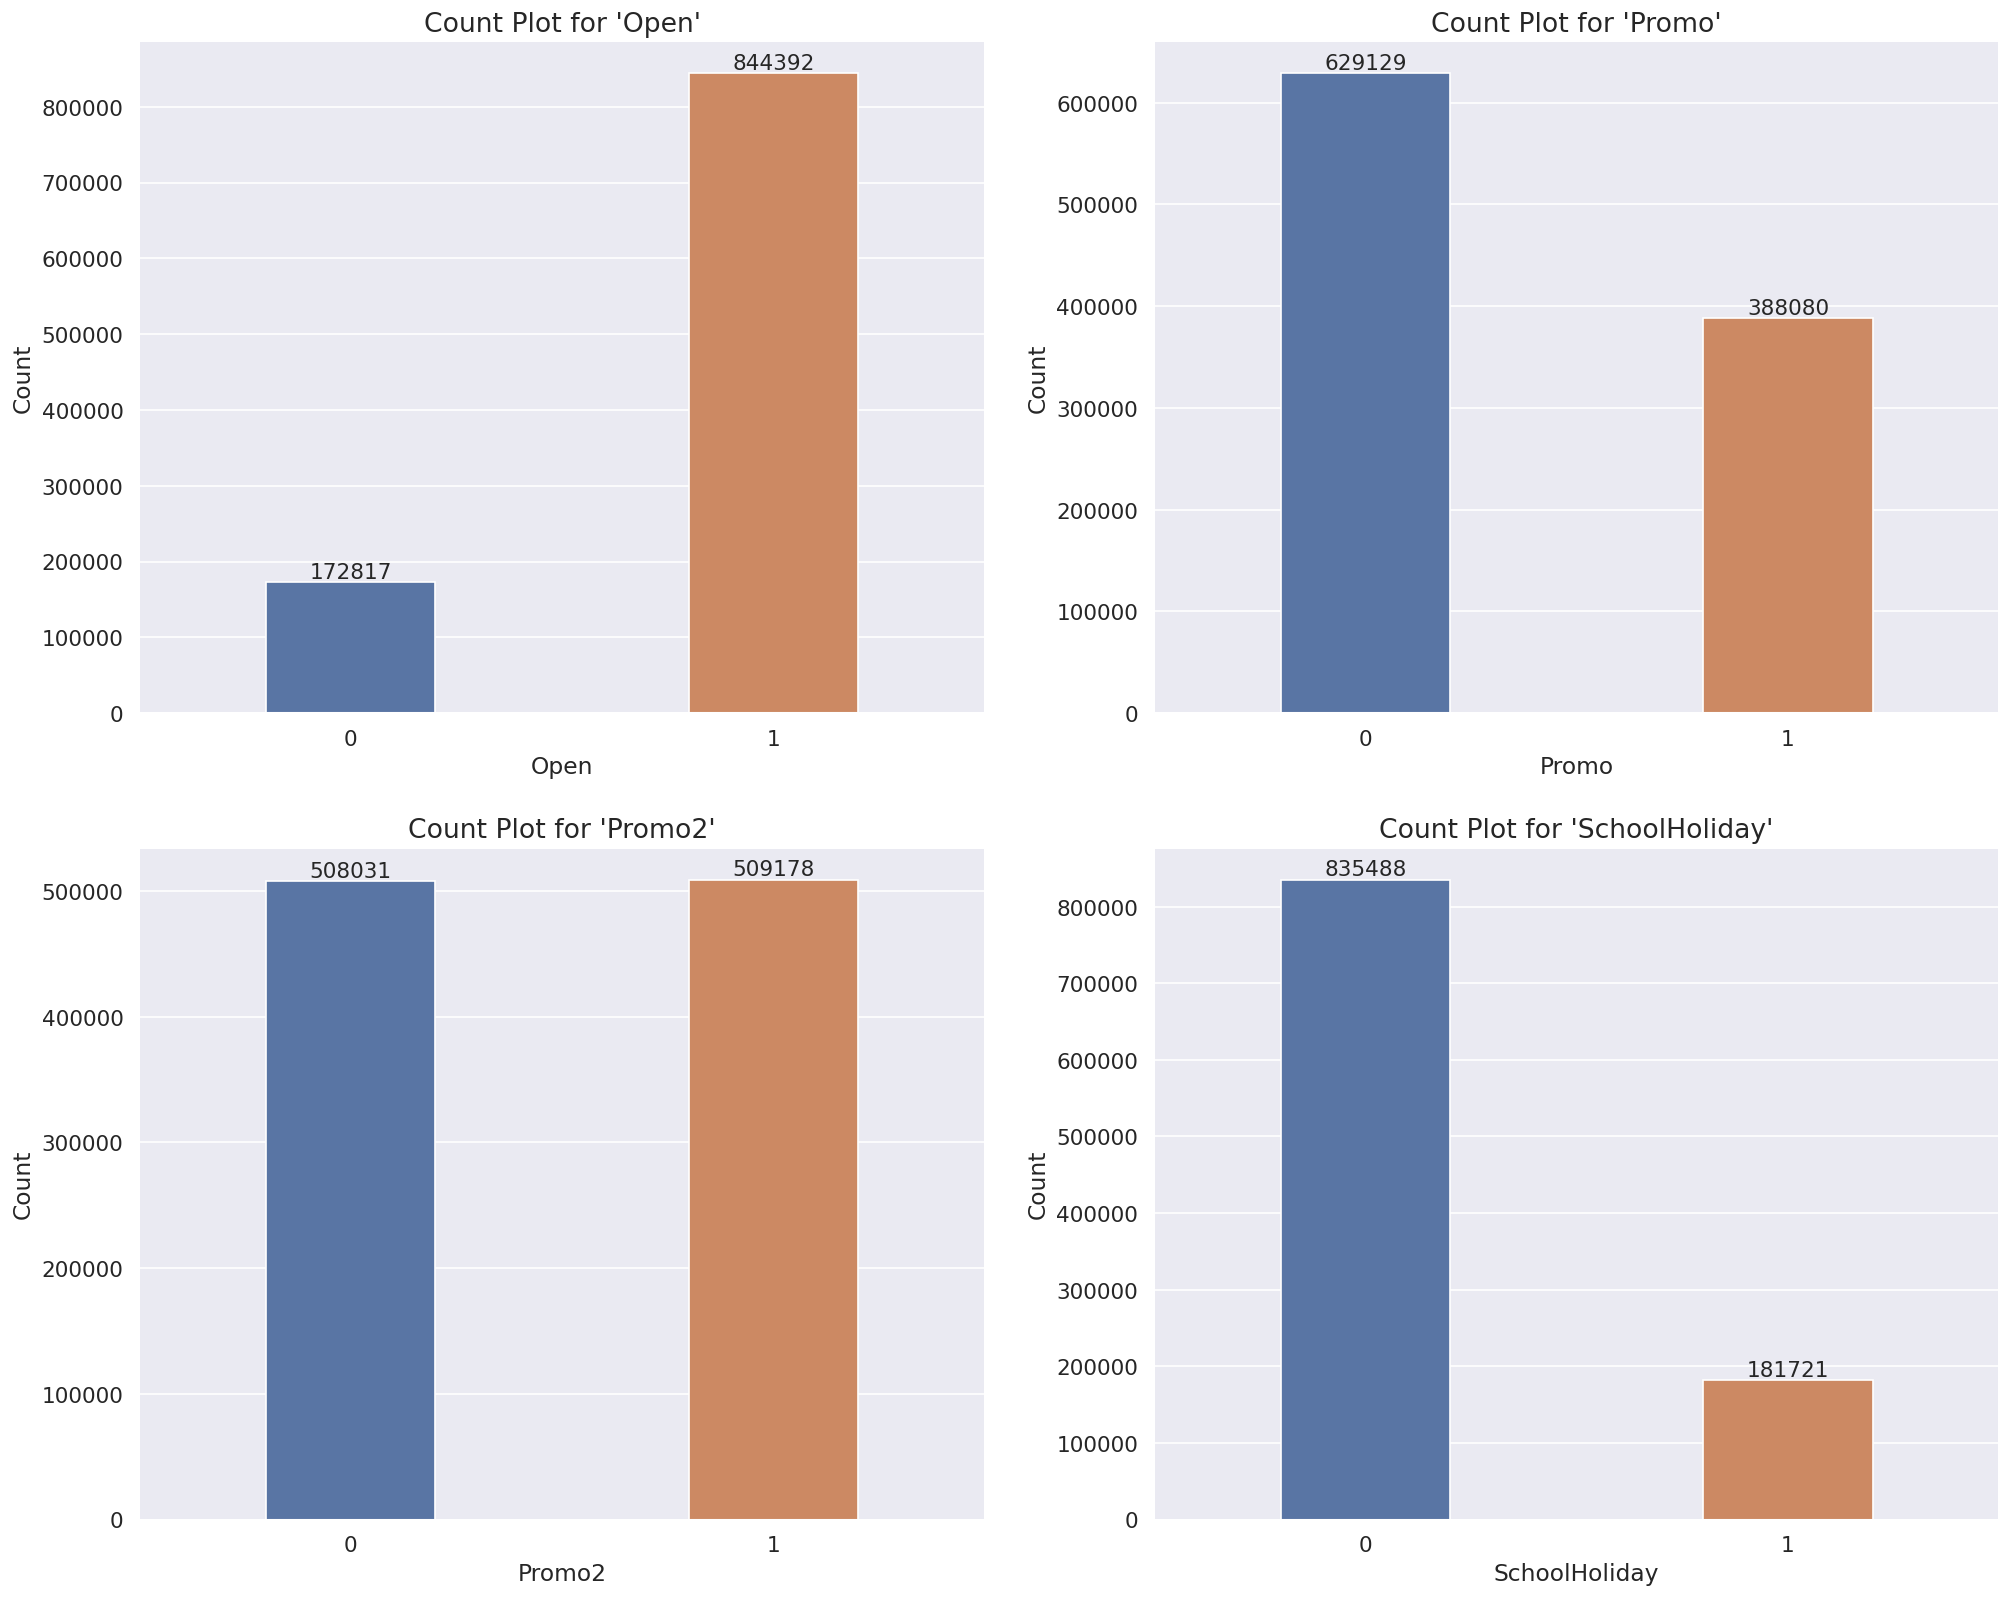

In [42]:
# Chart - 2 visualization code

features = ['Open', 'Promo','Promo2','SchoolHoliday']
fig,axes = plt.subplots(nrows=2, ncols=2,figsize = (20,16),dpi = 120)
for feature,axes in zip(features,axes.ravel()):
    sns.countplot(data = rossmann_sales_df,x = feature,ax = axes,width = 0.4)
    axes.bar_label(axes.containers[0],fontsize = 13)
    axes.set_title("Count Plot for "+f"'{feature}'",fontsize = 16)
    axes.set_xlabel(feature,fontsize = 14)
    axes.set_ylabel('Count',fontsize = 14)
    axes.tick_params(labelsize=13)
plt.show()

##### 1. Why did you pick the specific chart?

Here, we used a bar chart because it summarises a large amount of data in a visual, easily interpretable form and is used to describe the comparison between the different categorical or discrete variables, as long as there are not too many to compare.

##### 2. What is/are the insight(s) found from the chart?

* From the count plot of feature 'Open' it is clear that most of times store is open for sales.
* According to the count plot, more than 50 percent of the stores are not running the promo.
* Whereas in case of promo 2 half of the stores are participating in consecutive promotions, and the remaining half are not.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insights, we found that more than 50 percent of the stores are not running promotions, but if they do, that may result in an increase in sales.

#### Chart - 3



Count plots for Categorical variables

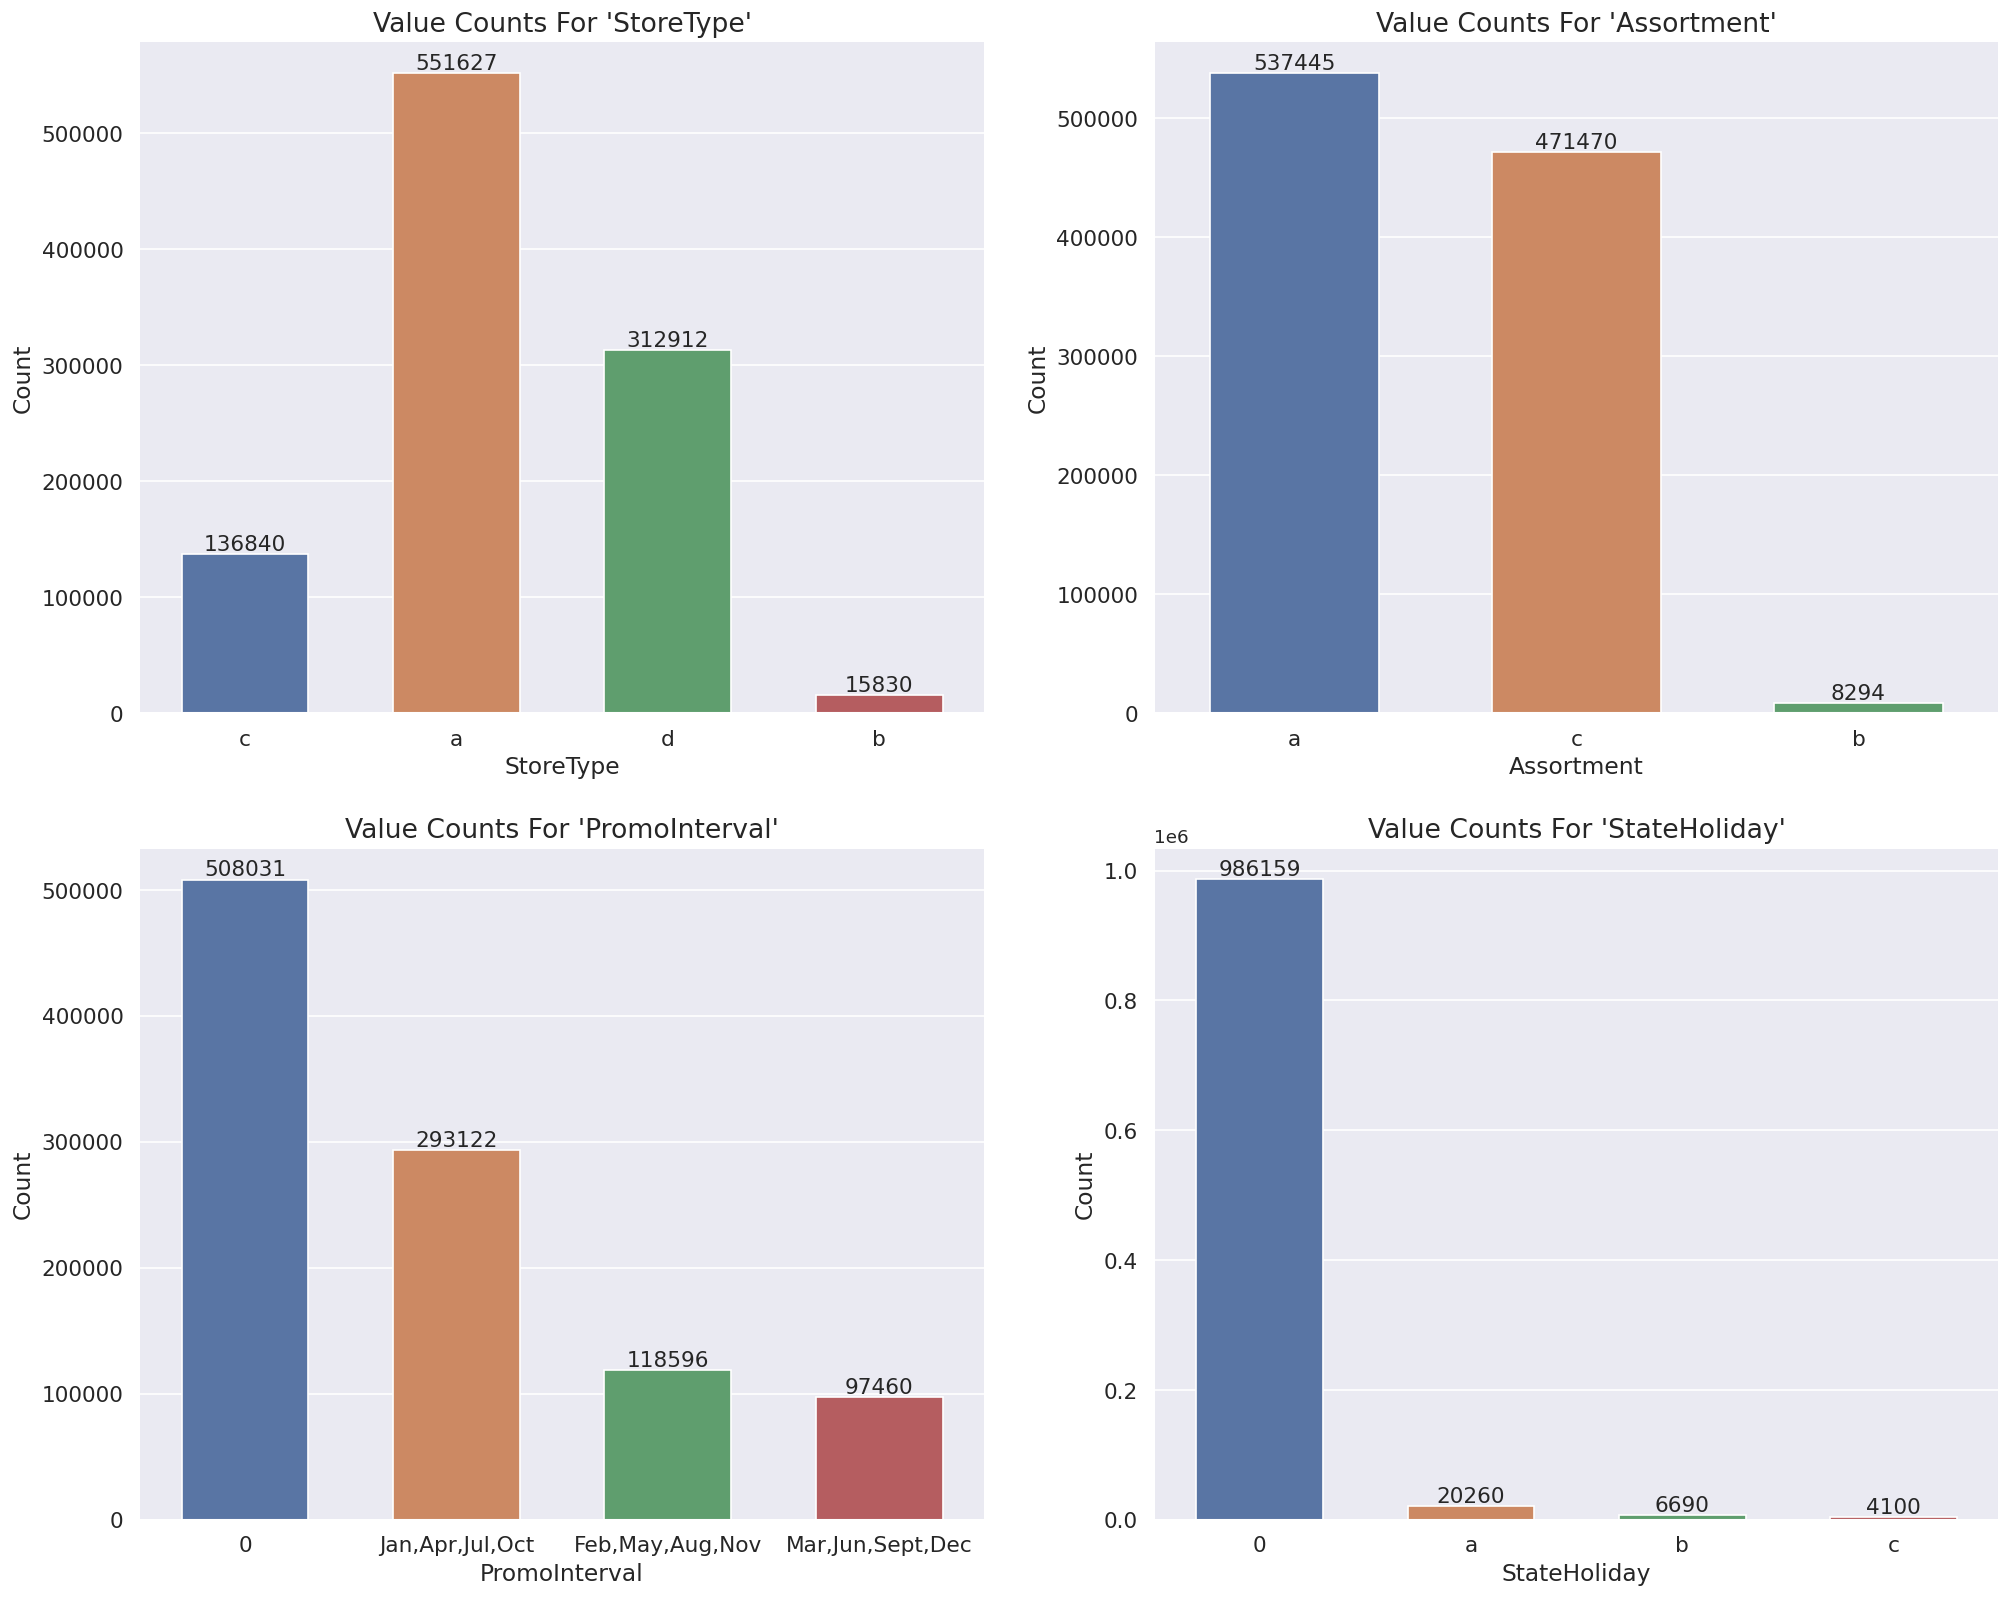

In [43]:
# Chart - 3 visualization code

features = ['StoreType', 'Assortment', 'PromoInterval','StateHoliday']
fig,axes = plt.subplots(nrows=2, ncols=2,figsize = (20,16),dpi = 120)
for feature,axes in zip(features,axes.ravel()):
    sns.countplot(data = rossmann_sales_df,x = feature,ax = axes,width = 0.6)
    axes.bar_label(container=axes.containers[0],label_type='edge',size =13)
    axes.set_title('Value Counts For'+' '+ f"'{feature}'",fontsize = 16)
    axes.set_xlabel(feature,fontsize = 14)
    axes.set_ylabel('Count',fontsize = 14)
    axes.tick_params(labelsize=13)
plt.show()

##### 1. Why did you pick the specific chart?

A count plot shows the counts of observations in each categorical bin using bars. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. That's why, to show the count of each category in a categorical variable, we used a count plot.

##### 2. What is/are the insight(s) found from the chart?

* The most stores are of type 'a' and 'd', while the fewest are of type 'b'.
* The maximum number of stores have assortment levels 'a' and 'c, and very few have level 'b'.
* The majority of the promotions run in the months of January, April, July, and October, with roughly the same number of promotions running in the months of February, May, August, November, and March, June, September, and December.
* There are approximately 31,000 total state holidays of types a,b and c.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Store types 'b' and 'c' are very few in number when compared to store type 'a, which means there is very high competition among store types 'a', so the strategy for sales should be good enough to stand out from the crowd.

#### Chart - 4

Sales vs Customer

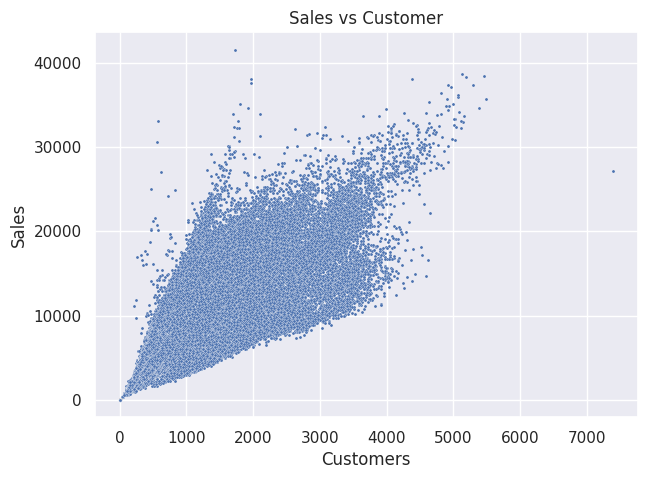

In [44]:
# Chart - 4 visualization code

plt.figure(figsize = (7,5))
sns.scatterplot(data = rossmann_sales_df,x= 'Customers',y = 'Sales',s = 5)
plt.title('Sales vs Customer')
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot (also known as a scatter chart or scatter graph) represents the values of two numerical variables with dots. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables. That's why, to find the relationship between sales and customers, we used a scatter plot.

##### 2. What is/are the insight(s) found from the chart?

* From the scatter plot, it is clear that there is a linear relationship between sales and customers and also that there is a positive correlation between sales and customers because as the number of customers increases, sales also increase.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insights, we can conclude that sales are linearly dependent on customers,so to increase sales, stores should focus on how to attract more customers because there is very high competition among the stores.

#### Chart - 5



Sales vs Competition Distance

<Axes: xlabel='CompetitionDistance', ylabel='Sales'>

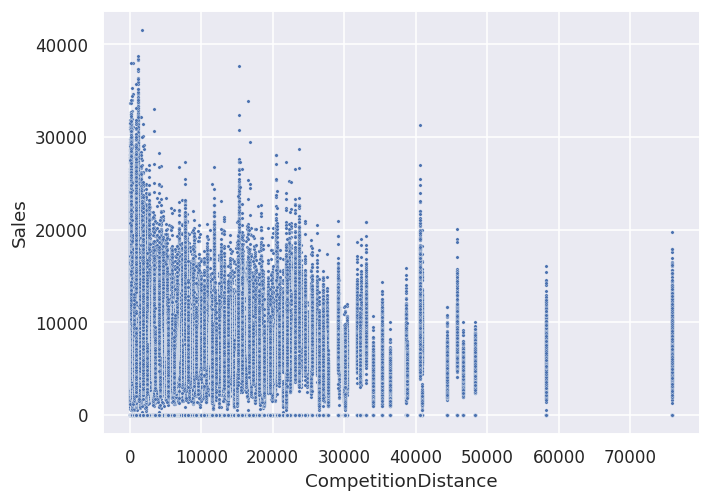

In [45]:
# Chart - 5 visualization code
plt.figure(figsize = (7,5),dpi = 110)
sns.scatterplot(data = rossmann_sales_df,x= 'CompetitionDistance',y = 'Sales',s = 5)

##### 1. Why did you pick the specific chart?

A scatter plot (also known as a scatter chart or scatter graph) represents the values of two numerical variables with dots. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables. That's why, to find the relationship between 'Sales' and 'CompetitionDistance', we used a scatter plot.

##### 2. What is/are the insight(s) found from the chart?

* There is a very low correlation between sales and competition distance, but sales are high when the competition distance is low, which indicates a negative correlation.Sales is high because of the fact that there are so many stores, but that will definitely impact the sales of one particular store.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Since the stores are densely located, this surely impacts the sales of a particular store, so running the continuous promotion may be a good initiative to increase the sales.

#### Chart - 6

Sales vs Store types

In [46]:
# Chart - 6 visualization code

# Dataframe for the total sales of different store types
total_store_sales = rossmann_sales_df.groupby('StoreType',as_index = False)['Sales'].sum().rename(columns = {'Sales':'Total_sales'})
total_store_sales

,StoreType,Total_sales
0,a,3165334859
1,b,159231395
2,c,783221426
3,d,1765392943


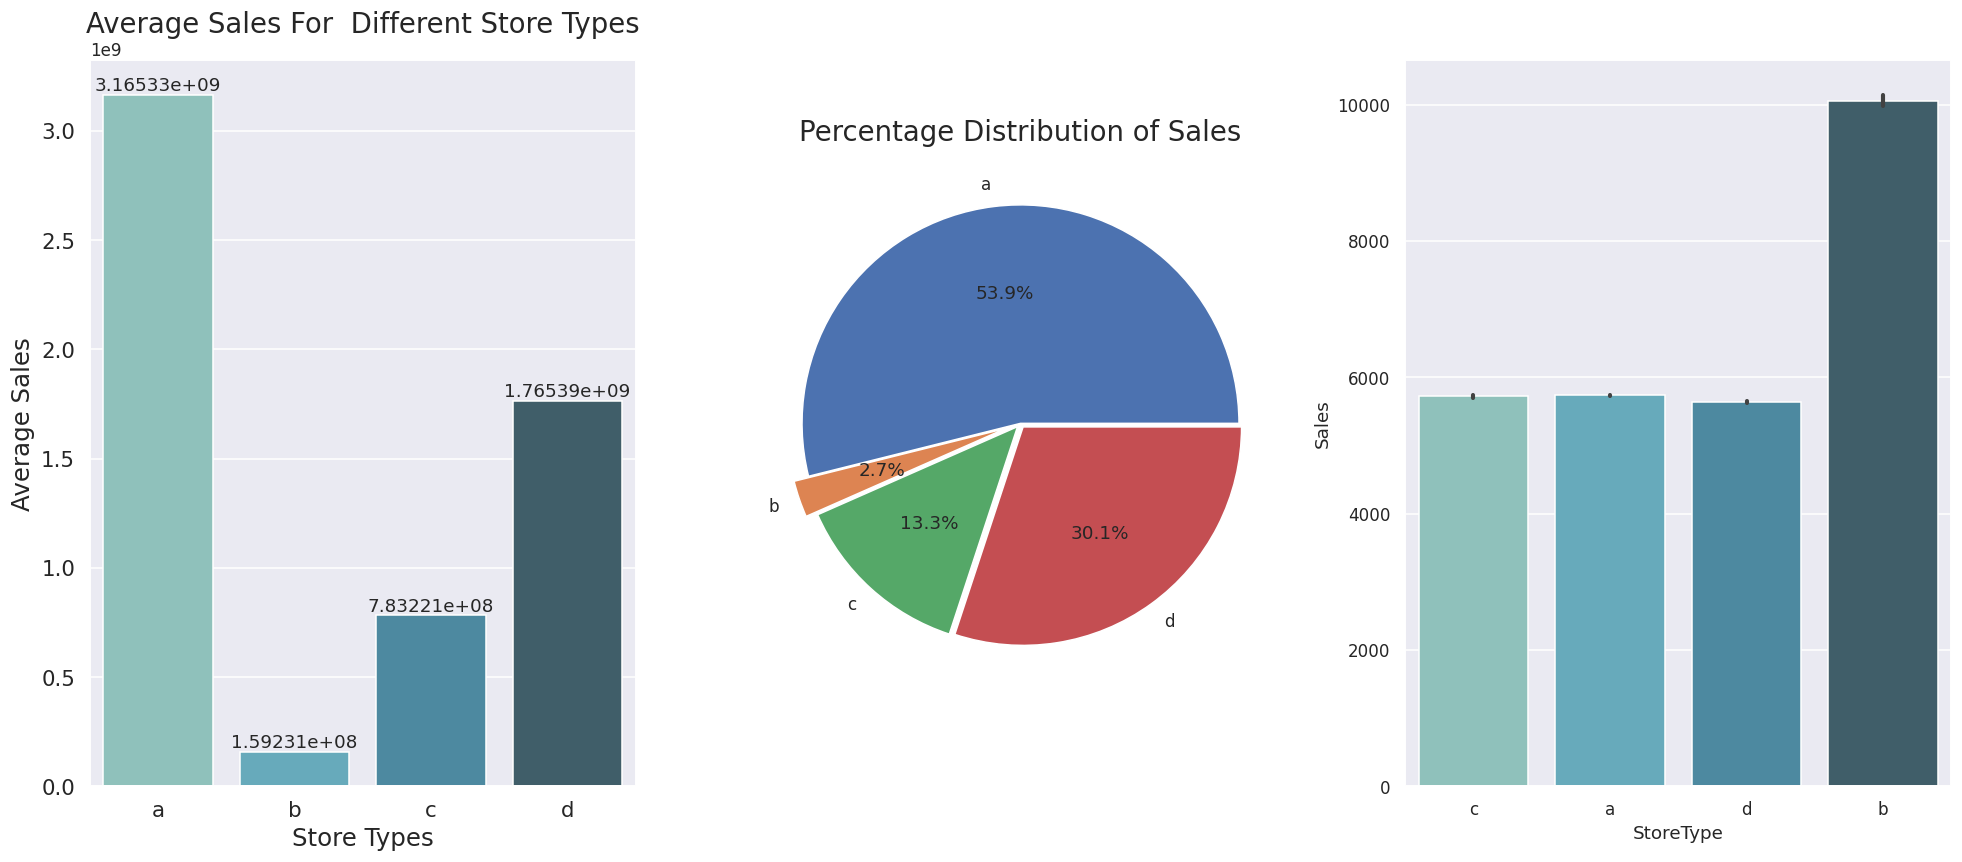

In [47]:
# Visualization
fig,ax = plt.subplots(1,3,figsize = (18,8),dpi = 110)

# bar plot for total sales of different store types
sns.barplot(data = total_store_sales,x = 'StoreType',y = 'Total_sales',palette='GnBu_d',ax = ax[0])
ax[0].bar_label(ax[0].containers[0], label_type='edge',size = 12)
ax[0].set_title('Total Sales For  Different Store Types',fontsize = 18)
ax[0].set_xlabel('Store Types',fontsize = 16)
ax[0].set_ylabel('Total Sales',fontsize = 16)
ax[0].tick_params(labelsize=14)

# pie plots for percentage distribution of sales
ax[1].pie(total_store_sales['Total_sales'],labels=total_store_sales.StoreType.values,autopct='%1.1f%%',explode = [0,0.07,0.02,0.02])
ax[1].set_title('Percentage Distribution of Sales',fontsize = 18)

# bar plot for average sales
sns.barplot(data = rossmann_sales_df,x = 'StoreType',y = 'Sales',palette='GnBu_d',ax = ax[2])
ax[0].set_title('Average Sales For  Different Store Types',fontsize = 18)
ax[0].set_xlabel('Store Types',fontsize = 16)
ax[0].set_ylabel('Average Sales',fontsize = 16)
ax[0].tick_params(labelsize=14)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

We used a bar chart because it summarises a large amount of data in a visual, easily interpretable form and is used to describe the comparison between the different categorical or discrete variables, as long as there are not too many to compare.

Secondly, we used a pie chart because a pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison by comparing the area covered in a circle with different colors. When comparing different percentages, pie charts are frequently used.

##### 2. What is/are the insight(s) found from the chart?

* Total sales is maximum for store type 'a, followed by store types 'd' and 'c'.
* Store type 'a' contributes 54 percent of the sales of all stores, whereas store type 'd' contributes up to 30 percent.
* Store type 'b' has the minimum sales which only 2.7 percent.
* Total sales depend on the number of stores; hence, total sales are high according to the order of the number of stores.
* Average sales for store type b is maximum and equal for store type 'a','c' and 'd'.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Store types 'a', 'c', and 'd' can adopt the business ideas and marketing techniques of store type 'b' because their sales are lower than those of store type 'b'.

#### Chart - 7

Sales vs day of week

In [48]:
# Chart - 7 visualization code

week_day_sales = rossmann_sales_df.groupby('DayOfWeek',as_index = False)['Sales'].sum().rename(columns = {'Sales':'Total_sales'})
week_day_sales

,DayOfWeek,Total_sales
0,1,1130203012
1,2,1020411930
2,3,954962863
3,4,911177709
4,5,980555941
5,6,846317735
6,7,29551433


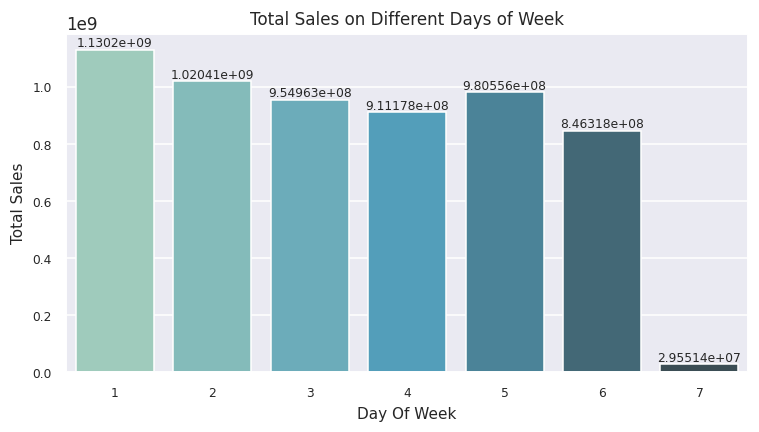

In [49]:
# Visualization
plt.figure(figsize = (8,4),dpi = 110)
plot = sns.barplot(data = week_day_sales,x = 'DayOfWeek',y = 'Total_sales',palette='GnBu_d')
plt.bar_label(plot.containers[0], label_type='edge',size = 8)
plt.title('Total Sales on Different Days of Week',fontsize=11)
plt.ylabel('Total Sales',fontsize=10)
plt.yticks(fontsize=8)
plt.xlabel('Day Of Week',fontsize=10)
plt.xticks(fontsize=8)
plt.show()

##### 1. Why did you pick the specific chart?

We used a bar chart here because it summarises a large amount of data in a visual, easily interpretable form and is used to describe the comparison between the different categorical or discrete variables, as long as there are not too many to compare.

##### 2. What is/are the insight(s) found from the chart?

* Sales are almost uniformly distributed up to the sixth day of the week.
* On the seventh day of the week, sales are very low, which may be because on that day most of the stores are closed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

On almost all weekdays, sales are approximately the same, except for the seventh day, so if a particular store wants to increase its sales on that day, then it can open a store on that day.

#### Chart - 8

Total Sales by Month and Year

<Axes: xlabel='Month', ylabel='Sales'>

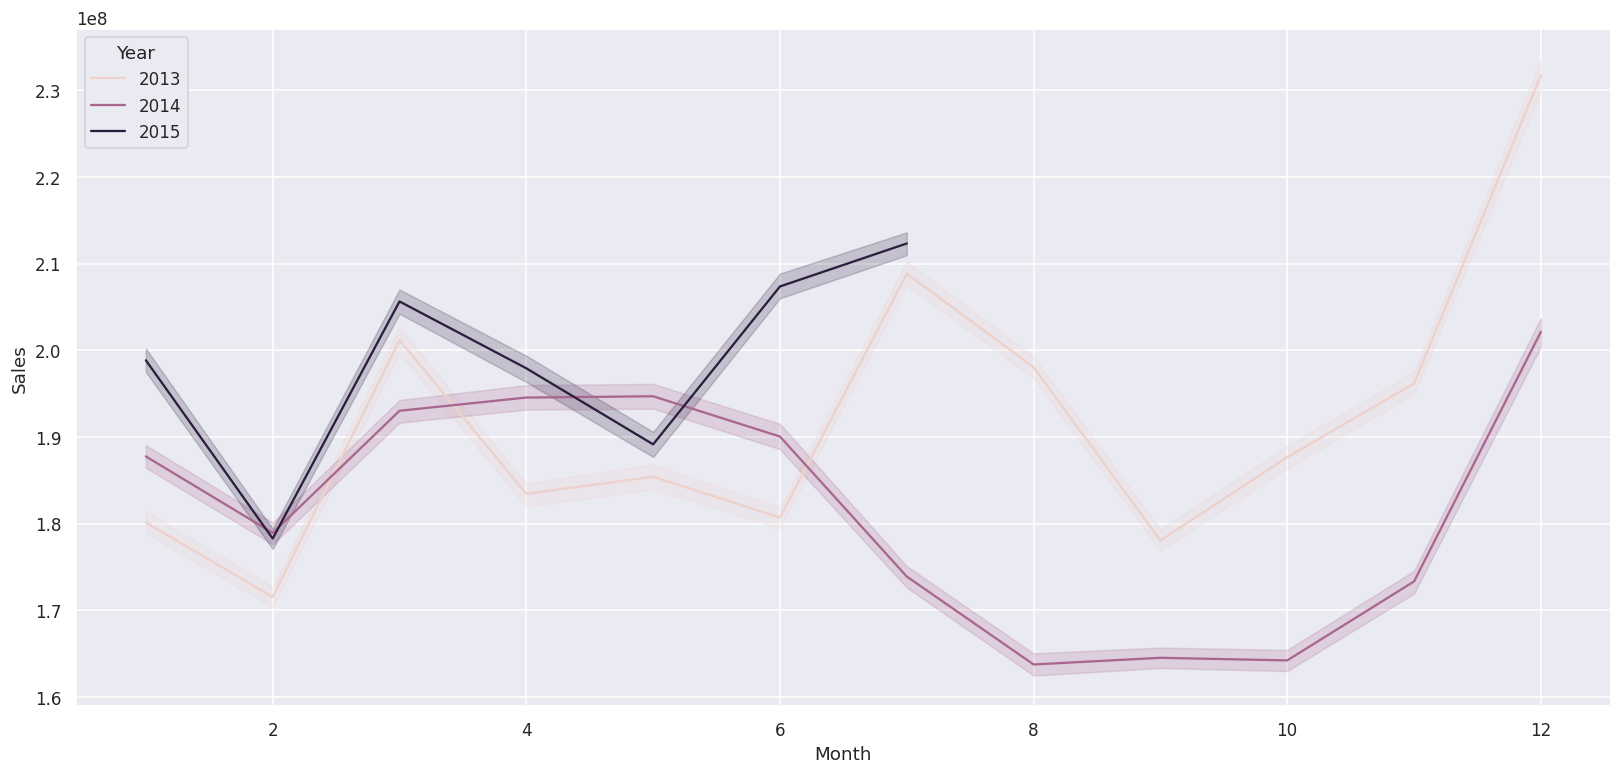

In [50]:
# Chart - 8 visualization code
plt.figure(figsize = (18,8),dpi = 110)
sns.lineplot(data = rossmann_sales_df,x = 'Month',y = 'Sales',hue = 'Year',estimator = 'sum')

##### 1. Why did you pick the specific chart?

We used a line chart because line charts are used to represent the relation between two variables (X and Y) on a different axis, and in our case we also have two variables ('Sales' and 'Year').

##### 2. What is/are the insight(s) found from the chart?

* Up to four months in all years, sales followed almost the same pattern, and for 2015, we have only seven months of sales data.
* Between the 6th and 12th months, sales in 2014 were lower than in 2013.
* In both 2013 and 2014, sales were at their highest in the final month of the year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insights, we found that sales in 2014 were lower than 2013 in the second half of the year. The target for the upcoming year should be to increase sales in the second half of the year.For this, try to adopt the strategies that were used in 2013 during the same time period.

#### Chart - 9

Average Sales by Month and Store Types

In [51]:
# Chart - 9 visualization code

# Dataframe for average sales by months for different store types
avg_monthly_store_sales = rossmann_sales_df.groupby(['Year','Month','StoreType'])['Sales'].mean().unstack()
avg_monthly_store_sales

StoreType             a             b            c            d
Year Month                                                     
2013 1      5295.606773   7825.675522  5166.859852  4957.471728
     2      5557.974430   8515.915966  5488.964044  5239.040948
     3      5831.116386   9091.789374  5891.525719  5611.640897
     4      5549.425471   8908.109804  5443.540991  5219.956897
     5      5353.131497   9697.730550  5364.180689  5171.427327
     6      5411.409192   9297.239216  5357.388514  5214.933333
     7      6085.029043   9315.700190  5879.792502  5876.826845
     8      5720.036491   9078.432638  5673.886007  5606.162681
     9      5318.562735   9317.209804  5248.528829  5167.191092
     10     5437.853231   9690.223909  5345.177201  5241.999629
     11     5832.438261  10105.170588  5914.404505  5691.905747
     12     6628.922731  11188.191651  6889.885789  6534.541342
2014 1      5401.431197   9408.425047  5335.615083  5331.223211
     2      5701.070301   9958.539916  5646.799469  5612.359811
     3      5550.226717   9831.172676  5437.254795  5498.180386
     4      5778.743023  10408.949020  5705.355180  5703.116571
     5      5551.810524  10541.174573  5563.590453  5562.144698
     6      5626.607198  10690.837255  5514.650000  5602.792337
     7      5977.266721  10346.173387  5851.276119  5856.210584
     8      5612.697783  10007.586694  5586.724362  5490.969917
     9      5849.572651  10155.179167  5692.875373  5724.589763
     10     5619.999253  10462.764113  5585.746028  5506.551891
     11     6104.279794  11160.800000  6192.245771  6019.654557
     12     6822.478827  11900.953629  7248.308137  6832.533768
2015 1      5623.919140   9967.785579  5754.426330  5768.985910
     2      5621.915816  10421.132353  5667.277027  5651.353654
     3      5865.646876  10599.092979  5846.529861  5910.027809
     4      5826.206589  10975.201961  5826.604955  5864.953640
     5      5352.071589  11140.709677  5359.486269  5450.784205
     6      6132.770598  11080.150980  6011.444369  6155.540805
     7      6027.736899  10874.925996  6066.334133  6142.896088

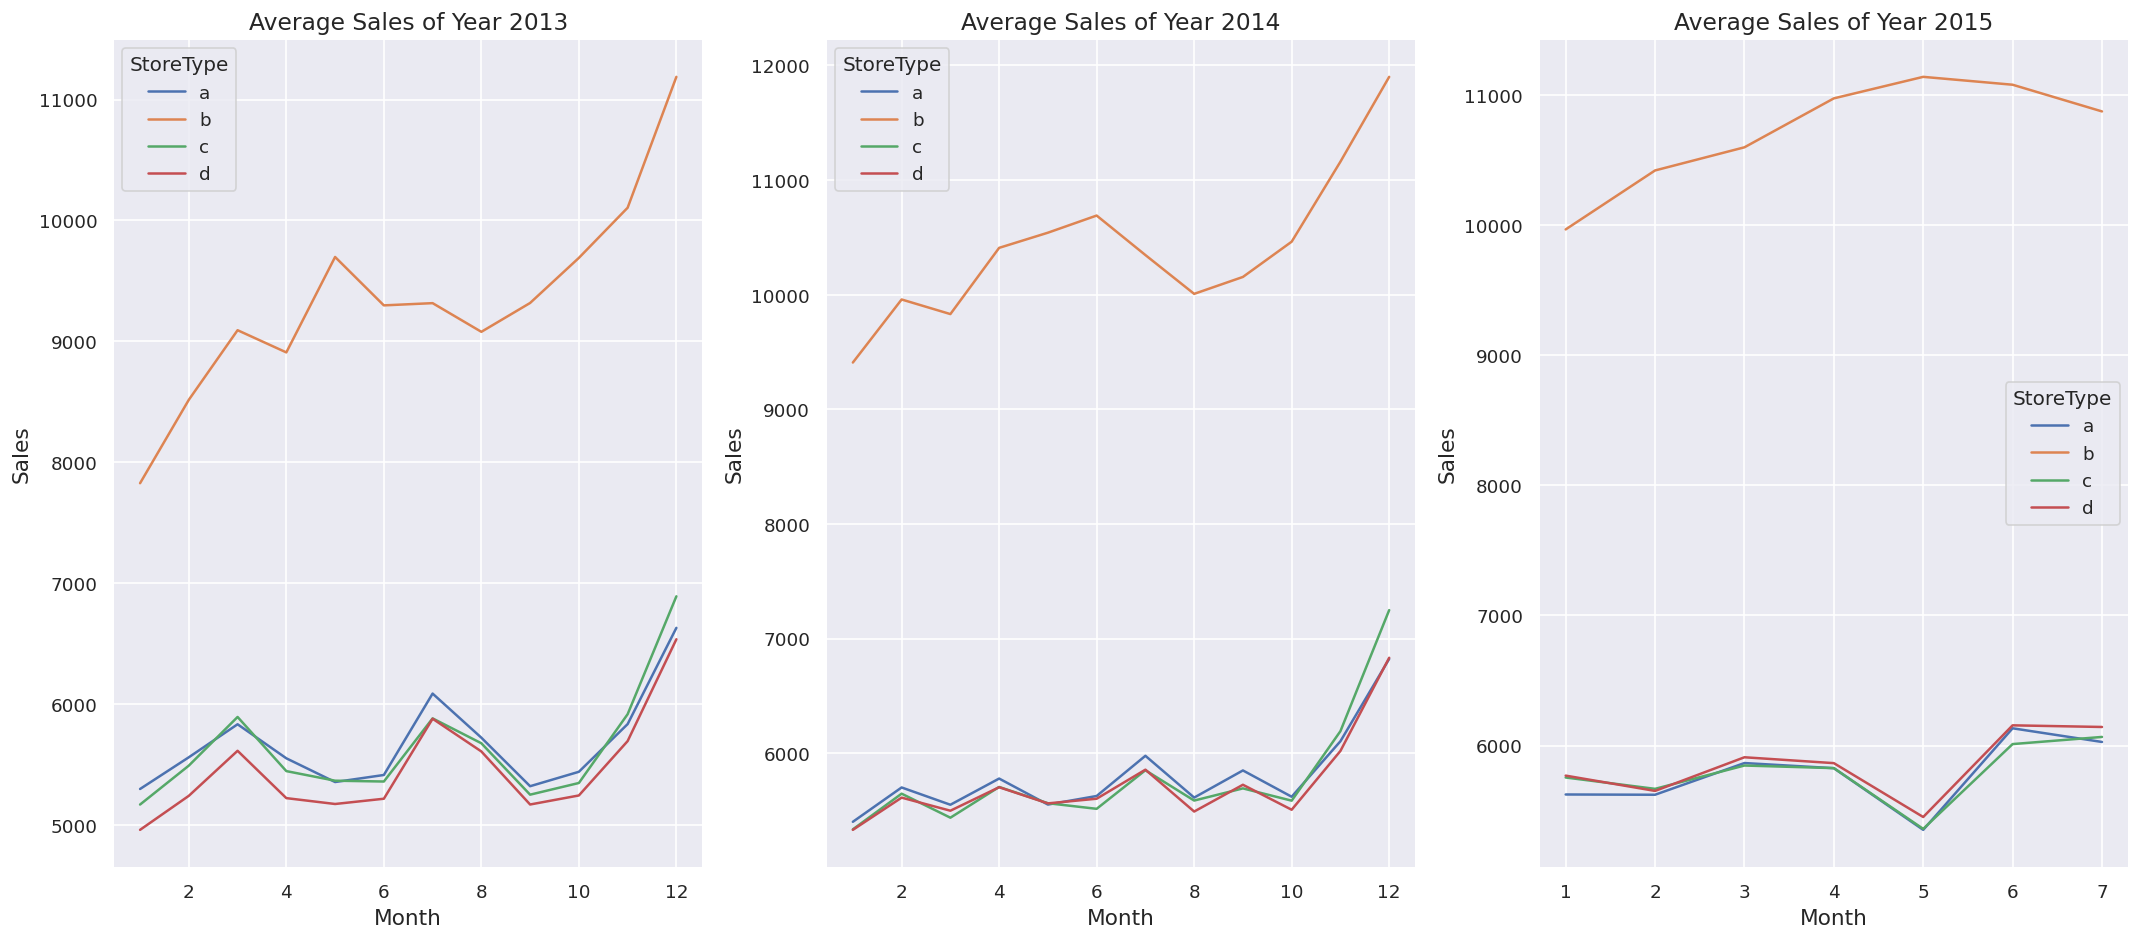

In [52]:
fig,ax = plt.subplots(1,3,figsize = (18,8),dpi = 120)
avg_monthly_store_sales.xs(2013).plot(kind  = 'line',ax = ax[0])
ax[0].set_title(('Average Sales of Year 2013'),fontsize=14)
ax[0].set_ylabel('Sales',fontsize=13)
ax[0].set_xlabel('Month',fontsize=13)

# Visualization of average sales by month for the year 2014
avg_monthly_store_sales.xs(2014).plot(kind  = 'line',ax = ax[1])
ax[1].set_title('Average Sales of Year 2014',fontsize=14)
ax[1].set_ylabel('Sales',fontsize=13)
ax[1].set_xlabel('Month',fontsize=13)

# Visualization of average sales by month for the year 2015
avg_monthly_store_sales.xs(2015).plot(kind  = 'line',ax = ax[2])
ax[2].set_title('Average Sales of Year 2015',fontsize=14)
ax[2].set_ylabel('Sales',fontsize=13)
ax[2].set_xlabel('Month',fontsize=13)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Python line charts are visual representations of data in which the datapoints are connected by lines. Line charts are frequently used to show sequential values which helps in recognising patterns.That's why to indentify sales pattern over the month we used a line chart.


##### 2. What is/are the insight(s) found from the chart?

* Store type 'b' has had the highest average sales during all these years.
* Sales for store types "a," "c," and "d" are nearly identical across the year.
* Sales followed almost the same pattern for years 2013 and 2014.
* For year 2013 and 2014 sales were maximum in the month of December.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Store types 'a', 'c', and 'd' can adopt the business ideas and marketing techniques of store type 'b' because their sales are lower than those of store type 'b'.

#### Chart - 10

Average Sales by Month and Assorment

In [53]:
# Chart - 10 visualization code

# Dataframe for average sales by months for different Assortment
avg_sales_by_assortment = rossmann_sales_df.groupby(['Year','Month','Assortment'])['Sales'].mean().unstack()
avg_sales_by_assortment

Assortment            a             b            c
Year Month                                        
2013 1      5149.331629   5727.501792  5274.427467
     2      5370.153698   6550.000000  5619.440476
     3      5623.927814   6896.942652  6028.513928
     4      5364.927263   7176.111111  5591.411696
     5      5187.708045   8196.003584  5518.376470
     6      5200.122485   7852.425926  5592.723652
     7      5805.083610   7661.465950  6287.586053
     8      5406.660230   7156.225806  6077.815821
     9      5094.190500   7658.533333  5546.491878
     10     5225.796878   8055.849462  5618.369113
     11     5567.153569   8473.662963  6162.662313
     12     6327.909482   9182.788530  7094.422625
2014 1      5183.344394   7833.942652  5677.023015
     2      5466.173633   8413.742063  5990.258076
     3      5305.152750   8415.469534  5857.216563
     4      5520.905396   8818.600000  6104.421572
     5      5340.293695   9088.605735  5910.011759
     6      5386.268353   9205.437037  5961.005133
     7      5677.015387   9217.810484  6285.270206
     8      5223.008571   8842.564516  6046.481644
     9      5543.601185   8925.358333  6152.846399
     10     5364.476380   9247.169355  5922.285293
     11     5829.052650   9889.508333  6485.958129
     12     6476.988055  10250.548387  7443.239241
2015 1      5399.974487   8716.892473  6108.532101
     2      5352.812937   9348.642857  6059.697438
     3      5569.033944   9359.759857  6328.664969
     4      5545.330073   9736.537037  6279.311176
     5      5103.916227  10108.616487  5816.405772
     6      5811.992243   9941.096296  6581.152372
     7      5702.203122   9717.379928  6589.188644

Text(0.5, 0, 'Month')

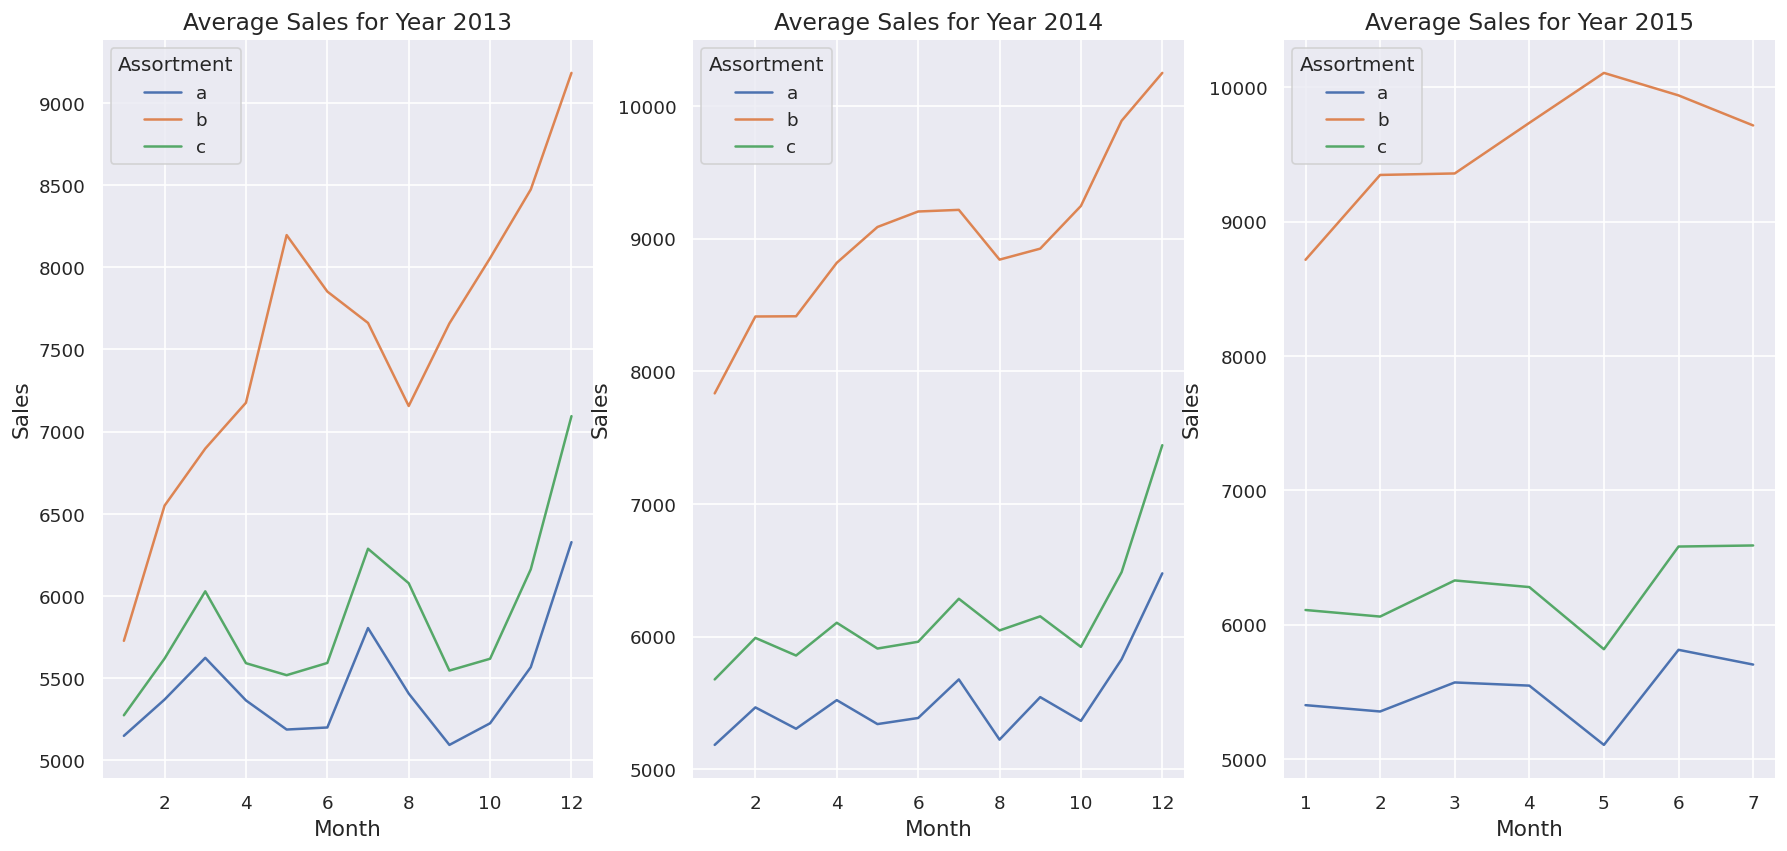

In [54]:
# Visualization of average sales by month for the year 2013
fig,ax = plt.subplots(1,3,figsize = (18,8),dpi = 120)
avg_sales_by_assortment.xs(2013).plot(kind  = 'line',ax = ax[0])
ax[0].set_title('Average Sales for Year 2013',fontsize=14)
ax[0].set_ylabel('Sales',fontsize=13)
ax[0].set_xlabel('Month',fontsize=13)

# Visualization of average sales by month for the year 2014
avg_sales_by_assortment.xs(2014).plot(kind  = 'line',ax = ax[1])
ax[1].set_title('Average Sales for Year 2014',fontsize=14)
ax[1].set_ylabel('Sales',fontsize=13)
ax[1].set_xlabel('Month',fontsize=13)

# Visualization of average sales by month for the year 2015
avg_sales_by_assortment.xs(2015).plot(kind  = 'line',ax = ax[2])
ax[2].set_title('Average Sales for Year 2015',fontsize=14)
ax[2].set_ylabel('Sales',fontsize=13)
ax[2].set_xlabel('Month',fontsize=13)

##### 1. Why did you pick the specific chart?

Python line charts are visual representations of data in which the datapoints are connected by lines. Line charts are frequently used to show sequential values which helps in recognising patterns.That's why to indentify sales pattern over the month we used a line chart.

##### 2. What is/are the insight(s) found from the chart?

* For assortment level 'b' sales is maximum during all the years.
* Throughout the year, sales for assortment levels "a" and "c" follow a similar pattern.
* Here also, sales are at their maximum for all types of assortment levels during the month of December.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Sales are minimum for assortment level 'a, which is a kind of basic level, so the assortment level of these stores can be upgraded to 'b' or 'c, which will lead to increased sales.

#### Chart - 11

Average sales on Days of the week with Promo and Promo 2

Text(0.5, 0, 'Day Of Week')

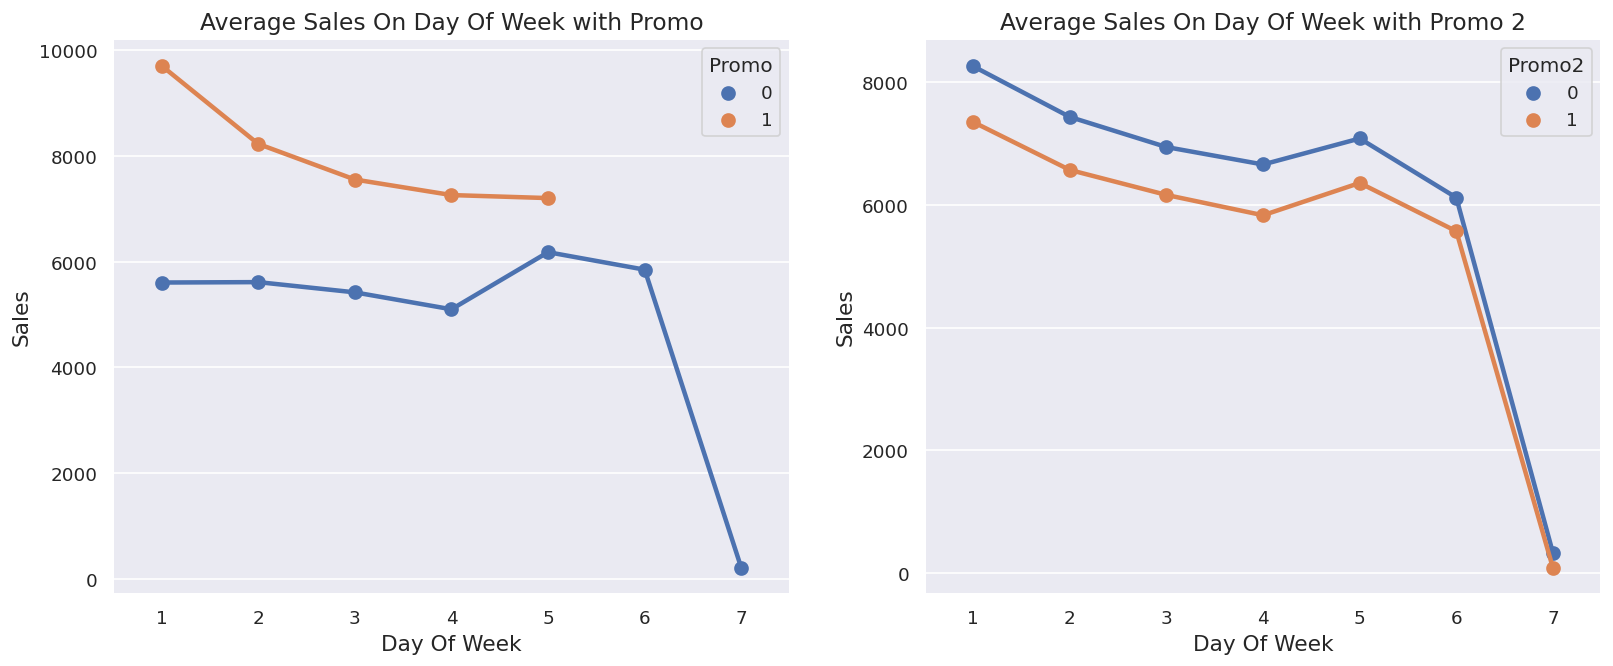

In [55]:
# Chart - 11 visualization code

# Visualization of average sales on Different days with Promo
fig,ax = plt.subplots(1,2,figsize = (16,6),dpi = 120)
sns.pointplot(data = rossmann_sales_df,x = 'DayOfWeek',y = 'Sales',hue = 'Promo',ax = ax[0])
ax[0].set_title('Average Sales On Day Of Week with Promo',fontsize=14)
ax[0].set_ylabel('Sales',fontsize=13)
ax[0].set_xlabel('Day Of Week',fontsize=13)

# Visualization of average sales on Different days with Promo 2
sns.pointplot(data = rossmann_sales_df,x = 'DayOfWeek',y = 'Sales',hue = 'Promo2',ax = ax[1])
ax[1].set_title('Average Sales On Day Of Week with Promo 2',fontsize=14)
ax[1].set_ylabel('Sales',fontsize=13)
ax[1].set_xlabel('Day Of Week',fontsize=13)

##### 1. Why did you pick the specific chart?

A point plot uses the position of the dot to indicate an estimate of the central tendency for a numerical variable, and error bars are used to show the degree of uncertainty around that estimate.Point plots can be more useful than bar plots for focusing comparisons between different levels of one or more categorical variables.For these reasons we used a point plot.

##### 2. What is/are the insight(s) found from the chart?

* Average Sales on days of the week are high when there is promo going on.
* Promo2 doesn't affect the sales as much as promo does.So there is very less advantage of consecutive promotions.
* Sales are minimum on 7th day of week.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Running a consecutive  promotion doesn't affect the sales of certain days of the week, so stopping the promo2 for some days of the week can be a good strategy, and starting the promo2 on week days may result in high sales.

#### Chart - 12

Average Sales on holidays

Text(0.5, 0, 'School Holidays')

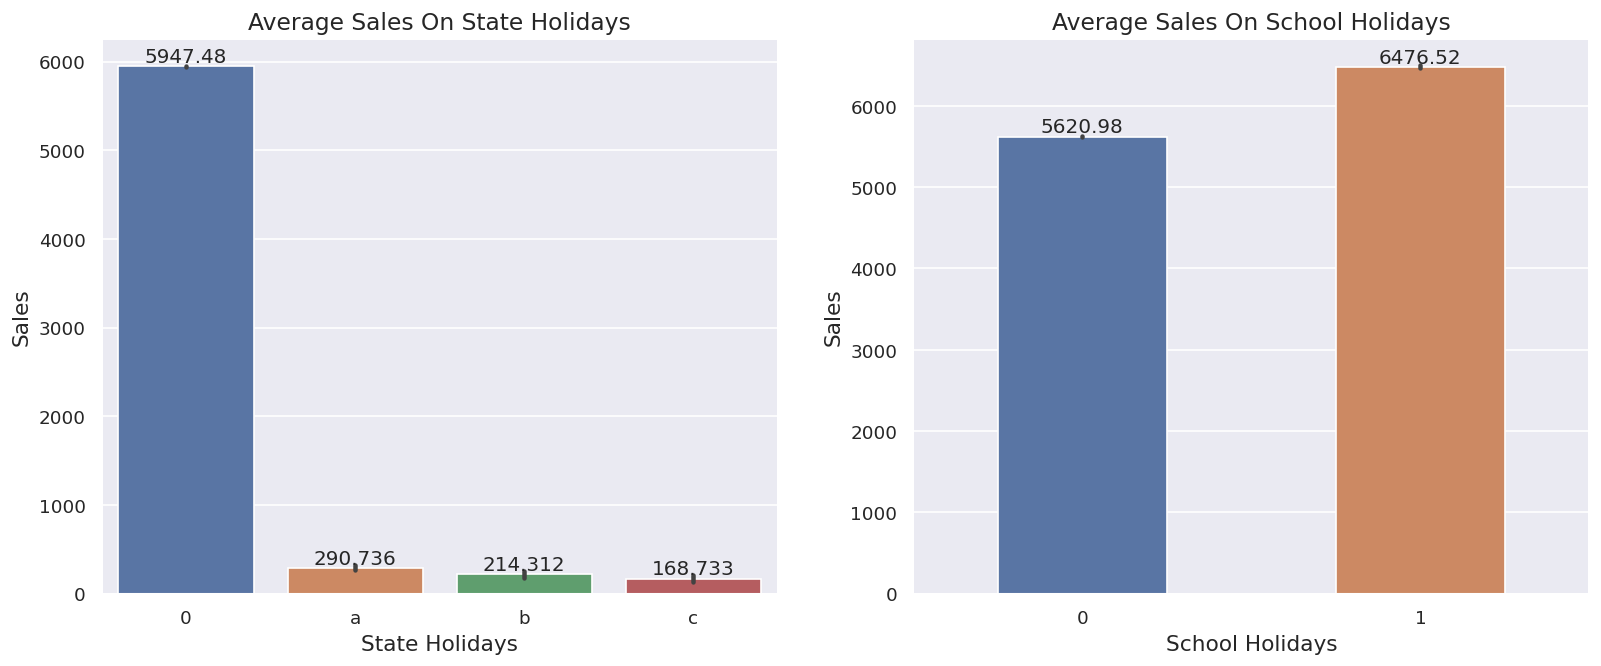

In [56]:
# Chart - 12 visualization code

# Visualization of average sales on State Holidays
fig,ax = plt.subplots(1,2,figsize = (16,6),dpi = 120)
sns.barplot(data = rossmann_sales_df, x = 'StateHoliday',y = 'Sales',ax = ax[0])
ax[0].bar_label(ax[0].containers[0], label_type='edge',size = 12)
ax[0].set_title('Average Sales On State Holidays',fontsize=14)
ax[0].set_ylabel('Sales',fontsize=13)
ax[0].set_xlabel('State Holidays',fontsize=13)

# Visualization of average sales on School Holidays
sns.barplot(data = rossmann_sales_df, x = 'SchoolHoliday',y = 'Sales',ax = ax[1],width = 0.5)
ax[1].bar_label(ax[1].containers[0], label_type='edge',size = 12)
ax[1].set_title('Average Sales On School Holidays',fontsize=14)
ax[1].set_ylabel('Sales',fontsize=13)
ax[1].set_xlabel('School Holidays',fontsize=13)


##### 1. Why did you pick the specific chart?

We used a bar chart because it summarises a large amount of data in a visual, easily interpretable form and is used to describe the comparison between the different categorical or discrete variables, as long as there are not too many to compare.

##### 2. What is/are the insight(s) found from the chart?

* On state holidays, sales are lower because of the holiday, but a school holiday doesn't affect sales much, although there is a slight increase in sales on school holidays.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The graph shows that whether there is a school holiday or not does not really matter. Nevertheless, companies can advertise more during school vacations to increase sales.

#### Chart - 13

Sales vs Competetion Since Year

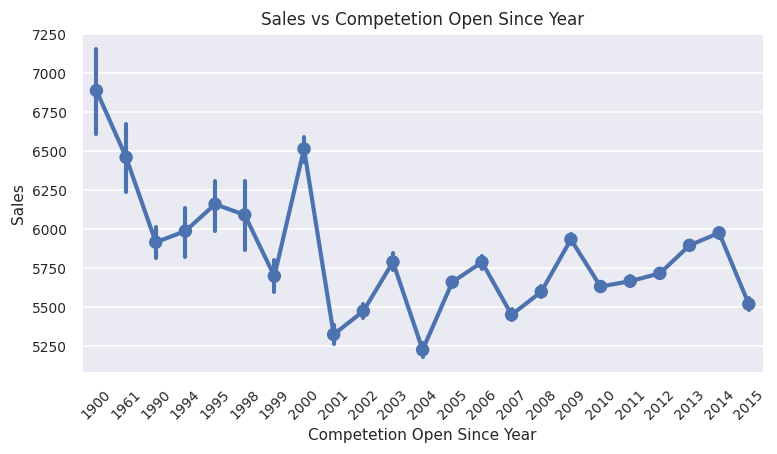

In [57]:
# Chart - 13 visualization code
plt.figure(figsize = (8,4),dpi = 110)
sns.pointplot(data = rossmann_sales_df,x = 'CompetitionOpenSinceYear',y = 'Sales')
plt.title('Sales vs Competetion Open Since Year',fontsize=11)
plt.ylabel('Sales',fontsize=10)
plt.xlabel('Competetion Open Since Year',fontsize=10)
plt.xticks(rotation = 45,fontsize = 9)
plt.yticks(fontsize = 9)
plt.show()

##### 1. Why did you pick the specific chart?

A point plot uses the position of the dot to indicate an estimate of the central tendency for a numerical variable, and error bars are used to show the degree of uncertainty around that estimate.Point plots can be more useful than bar plots for focusing comparisons between different levels of one or more categorical variables.For these reasons we used a point plot.

##### 2. What is/are the insight(s) found from the chart?

* Sales were maximum during year 1900 because there are very few stores and competetion is very less.
* As the duration of the competition increased, more stores were opened, and increased competition resulted in decreased sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the plot, it is clear that there is a sudden increment and decrement in sales with an increasing number of years, and we don't know the exact reason for this behaviour. So we need to analyse more factors to explain this behaviour.

#### Chart - 14

Sales vs Promointerval

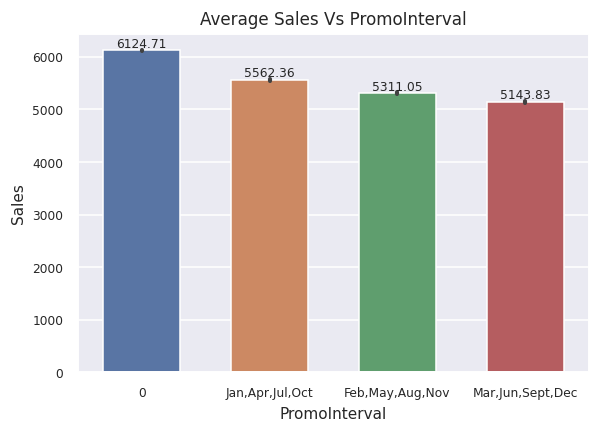

In [58]:
# Chart - 14 Visualization Code

plt.figure(figsize = (6,4),dpi = 110)
plot = sns.barplot(data = rossmann_sales_df,x= 'PromoInterval',y = 'Sales',width = 0.6)
plt.bar_label(plot.containers[0], label_type='edge',size = 8)
plt.title('Average Sales Vs PromoInterval',fontsize=11)
plt.ylabel('Sales',fontsize=10)
plt.yticks(fontsize=8)
plt.xlabel('PromoInterval',fontsize=10)
plt.xticks(fontsize=8)
plt.show()

##### 1. Why did you pick the specific chart?

Here we used a bar chart because it summarises a large amount of data in a visual, easily interpretable form and is used to describe the comparison between the different categorical or discrete variables, as long as there are not too many to compare.

##### 2. What is/are the insight(s) found from the chart?

* Promointerval doesn't affect sales because sales are the same throughout, so it doesn't matter whether there is a promointerval or not.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As explained above, consecutive promotion doesn't affect the sales much, so these strategies for promotions should be redesigned to get maximum sales during the time of low sales.

#### Chart - 15 - Correlation Heatmap

 Correlation Heatmap

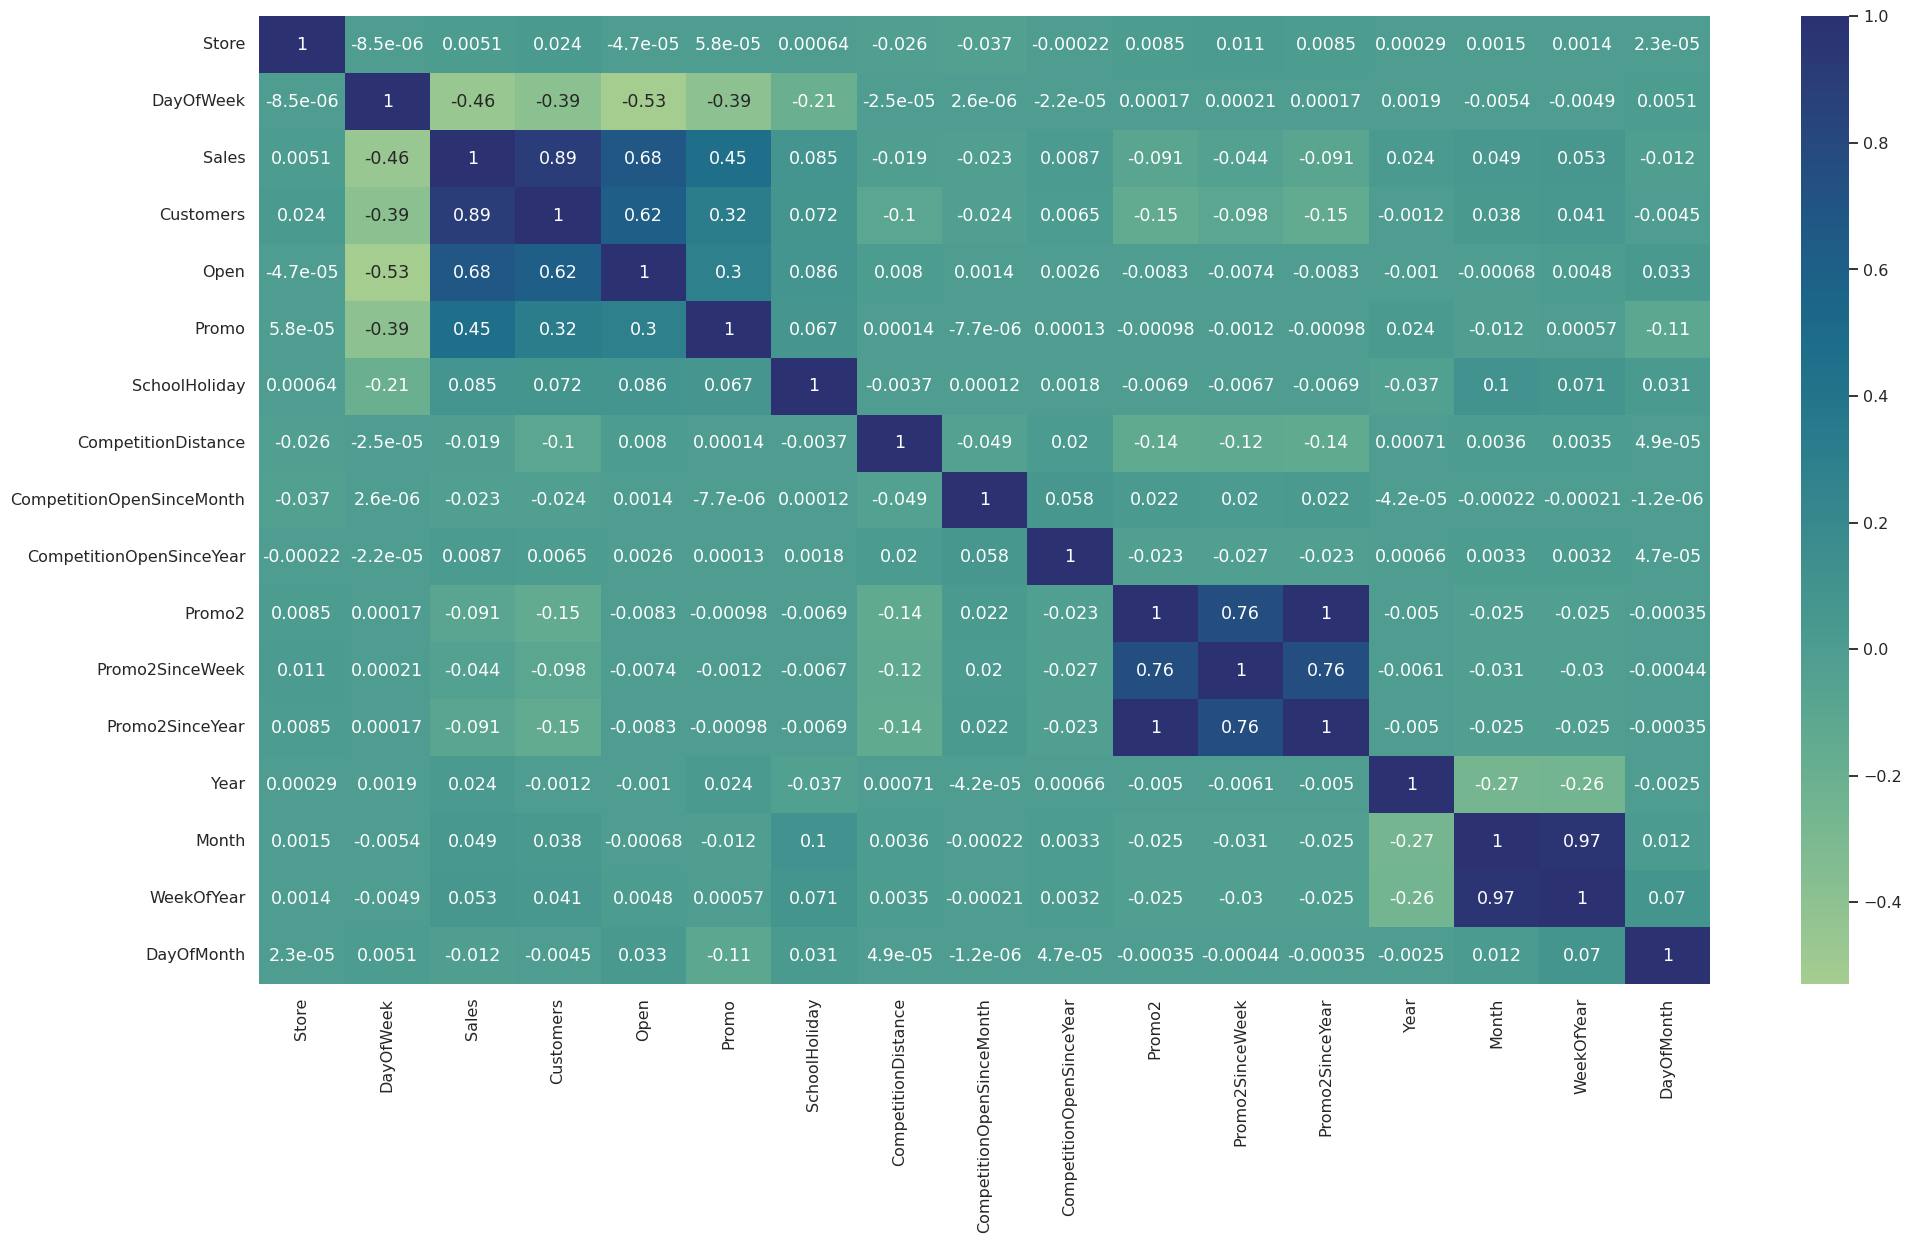

In [59]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,12),dpi = 105)
correlation = rossmann_sales_df.corr()
sns.heatmap(correlation,annot=True,cmap ='crest')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A heat map is a two-dimensional representation of data in which values are represented by colors. A simple heat map provides an immediate visual summary of information. So for the visualization of correlation values between different features,we used a heat map.

##### 2. What is/are the insight(s) found from the chart?

* Correlation between sales and customers is very high (i.e 0.89).
* There is multicollinearity among some features that needs to be treated before applying regression algorithms.
* For example - month and week of year,promo2 and promo2sinceweek etc.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [60]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [61]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [62]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [63]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [64]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [65]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [66]:
# Expand Contraction

#### 2. Lower Casing

In [67]:
# Lower Casing

#### 3. Removing Punctuations

In [68]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [69]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [70]:
# Remove Stopwords

In [71]:
# Remove White spaces

#### 6. Rephrase Text

In [72]:
# Rephrase Text

#### 7. Tokenization

In [73]:
# Tokenization

#### 8. Text Normalization

In [74]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [75]:
# POS Taging

#### 10. Text Vectorization

In [76]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [77]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [78]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [79]:
# Transform Your data

### 6. Data Scaling

In [80]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [81]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [82]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [83]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [84]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [85]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [86]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [87]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [88]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [89]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [90]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [91]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [92]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [93]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***